<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mulearn" data-toc-modified-id="mulearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>mulearn</a></span><ul class="toc-item"><li><span><a href="#Install" data-toc-modified-id="Install-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install</a></span></li><li><span><a href="#How-to-use" data-toc-modified-id="How-to-use-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How to use</a></span></li></ul></li></ul></div>

In [ ]:
#hide
from mulearn import kernel

# mulearn

mulearn is a python package implementing the data-driven induction of fuzzy sets described in

- D. Malchiodi and W. Pedrycz, _Learning Membership Functions for Fuzzy Sets through Modified Support Vector Clustering_, in F. Masulli, G. Pasi e R. Yager (Eds.), Fuzzy Logic and Applications. 10th International Workshop, WILF 2013, Genoa, Italy, November 19–22, 2013. Proceedings., Vol. 8256, Springer International Publishing, Switzerland, Lecture Notes on Artificial Intelligence.

## Install

`pip install mulearn`

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
import pandas as pd

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(source, header=None)

iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_values = iris_df.iloc[:,0:4].values
iris_labels = iris_df.iloc[:,4].values

In [ ]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values)

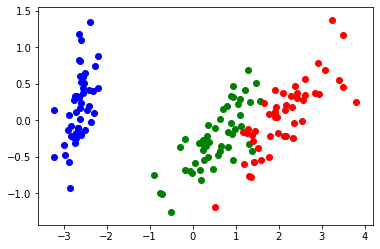

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [ ]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [ ]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from mulearn import FuzzyInductor
from mulearn.fuzzifier import LinearFuzzifier

In [ ]:
sigmas = [.225,.5]
parameters = parameters = {'c':[1,10,100],
                           'k':[GaussianKernel(i) for i in sigmas]}

In [ ]:
f = FuzzyInductor(fuzzifier=LinearFuzzifier)

virginica = GridSearchCV(estimator=f, param_grid=parameters, n_jobs=-1)
virginica.fit(iris_values_2d, mu['Iris-virginica'])

100%|██████████| 100/100 [00:19<00:00,  5.22it/s]


GridSearchCV(cv=None, error_score=nan,
             estimator=FuzzyInductor(c=1,
                                     fuzzifier=<class 'mulearn.fuzzifier.LinearFuzzifier'>,
                                     k=GaussianKernel(1), random_state=None,
                                     return_profile=False,
                                     solve_strategy=(<function solve_optimization_tensorflow at 0x7f65d8ae1268>,
                                                     {})),
             iid='deprecated', n_jobs=-1,
             param_grid={'c': [1, 10, 100],
                         'k': [GaussianKernel(0.225), GaussianKernel(0.5)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

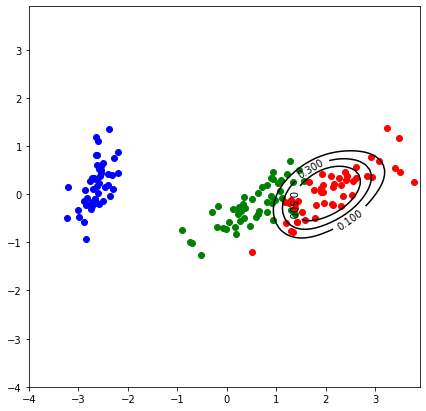

In [ ]:
import numpy as np

plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(virginica.best_estimator_.estimated_membership_)
plt.show()